<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [1]:
# Utilice este espacio para escribir el código.

import pandas as pd

casciari = pd.read_csv('data/blog_casciari.csv')
casciari

,titulo,fecha,cuento
0,El rincón blanco,1/11/08,De pronto yo estaba en el hogar donde pasé la ...
1,Mínimos avances en la cama,1/24/08,"Menos la cama, todo ha mejorado en este mundo...."
2,Don Marcos,2/19/08,"Dos veces, y no una, mi abuelo materno me ayud..."
3,Los dos rulfos,3/26/08,"A su regreso de México, mi amigo Comequechu no..."
4,La noticia no es el perro,4/15/08,"De repente, un video de You Tube recibe un mil..."
...,...,...,...
515,Instrucciones para la masturbación del hijo,8/18/07,Si lees estas líneas es porque hoy cumples tre...
516,El colmo de un campesino,9/24/07,"Hace algunos días Natalia Méndez, una editora ..."
517,La decadencia del Hombre Corbata,10/16/07,El actual Hombre Corbata es el último eslabón ...
518,El sentido del olfato en los trenes,10/26/07,Mi nombre no importa; no voy a presentarme. Lo...


In [2]:
casciari['fecha'] = pd.to_datetime(casciari['fecha'])

In [3]:
casciari.describe()

,titulo,fecha,cuento
count,520,520,520
unique,520,499,520
top,El rincón blanco,2003-10-01 00:00:00,De pronto yo estaba en el hogar donde pasé la ...
freq,1,3,1
first,NaN,2003-09-20 00:00:00,NaN
last,NaN,2015-11-17 00:00:00,NaN


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Cargar la libreria de pandas
2. Cargar los datos de los blog de Casciari en un dataframe utilizando la función pd.read_csv}

**Análisis:**
La base esta compuesta de tres columnas: título del blog, fecha de publicación y contenido del blog, y 520 entradas de bloog. Los blogs contenidos en la base fueron publicados entre Septiembre 2003 y Noviembre 2015, siendo Occtubre 2003 el mes con la mayor cantidad de blogs publicados. 

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [4]:
# Cargar librerias necesarias
import re
import unidecode

# Eliminar tildes de titulo y cuento
#casciari['titulo'] = casciari['titulo'].apply(lambda x: unidecode.unidecode(x)) 
casciari['cuento'] = casciari['cuento'].apply(lambda x: unidecode.unidecode(x))

casciari[casciari['titulo'] == 'La venganza del metegol']['cuento'].iloc[0]

'El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre futbol, al final de la charla el director de la editorial nos invito a jugar un partido de metegol (ese invento espanol al que sus creadores llaman, erroneamente, futbolin). Hacia anos que no jugaba al metegol, pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar. Nuestros contrincantes eran el autor del libro y el director de la editorial. De los tres, a este ultimo lo conocia desde la juventud.\nJugamos dos partidos enteros y los destrozamos con una facilidad pasmosa: hacia anos que no practicaba este falso deporte de munecas y reflejos, pero descubri que no habia perdido las manas. Eso me hizo sentir bien: a mi edad cualquier destreza que mantengamos indemne, por mas pelotuda que sea, se convierte en una gran noticia.\nDespues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a Twitter.\n-- Estadio: Libreria Gandhi, Buenos Aire

In [5]:
# Eliminar signos de puntuación y otros
#casciari['titulo'] = casciari['titulo'].apply(lambda x: re.sub("[^\\w\\s]|\n", ' ', x)) 
casciari['cuento'] = casciari['cuento'].apply(lambda x: re.sub("[^\\w\\s]|\n", ' ', x))

# Eliminar números
#casciari['titulo'] = casciari['titulo'].apply(lambda x: re.sub("\d+", "", x)) 
casciari['cuento'] = casciari['cuento'].apply(lambda x: re.sub("\d+", "", x))

# Eliminar espacios dobles
#casciari['titulo'] = casciari['titulo'].apply(lambda x: re.sub('\s+', ' ', x)) 
casciari['cuento'] = casciari['cuento'].apply(lambda x: re.sub('\s+', ' ', x))

# Eliminar las mayúsculas
#casciari['titulo'] = casciari['titulo'].apply(lambda x: x.lower())
casciari['cuento'] = casciari['cuento'].apply(lambda x: x.lower())

casciari[casciari['titulo'] == 'La venganza del metegol']['cuento'].iloc[0]

'el mes pasado me invitaron a presentar un libro en buenos aires y como era un libro sobre futbol al final de la charla el director de la editorial nos invito a jugar un partido de metegol ese invento espanol al que sus creadores llaman erroneamente futbolin hacia anos que no jugaba al metegol pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar nuestros contrincantes eran el autor del libro y el director de la editorial de los tres a este ultimo lo conocia desde la juventud jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa hacia anos que no practicaba este falso deporte de munecas y reflejos pero descubri que no habia perdido las manas eso me hizo sentir bien a mi edad cualquier destreza que mantengamos indemne por mas pelotuda que sea se convierte en una gran noticia despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a twitter estadio libreria gandhi buenos aires locales a la izquierda ale

In [6]:
## Proceso de Tokenización

# Cargamos la librería a utilizar
import spacy

# Cargar el modelo para el español
nlp = spacy.load("es_core_news_sm")

In [7]:
# Tokenizar el campo titulo y cuento
#casciari['titulo'] = casciari['titulo'].apply(lambda x: nlp(x))
casciari['cuento'] = casciari['cuento'].apply(lambda x: nlp(x)) 

In [8]:
# Eliminar las stopwords

# Cargar el archivo adicional de extra_stopwords
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

# Agregamos los nuevas stopwords a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords

# Cargar segundo archivo adicional de stopwords_taller
stopwords_taller = pd.read_csv('data/stopwords_taller.csv', sep=',',header=None)
stopwords_taller.columns = ['stopwords']
stopwords_taller=set(stopwords_taller['stopwords'].to_list())

# Agregamos los nuevas stopwords_taller a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= stopwords_taller

# Creación de función de filtrado de stopwords
def filtrar_stopwords(text):
    text_filtrado = [token.text for token in text if not token.is_stop]
    text_filtrado = " ".join(text_filtrado)
    return text_filtrado

# Aplizar función de filtrar_stopwords a titulo y cuento
#casciari['titulo'] = casciari['titulo'].apply(lambda x: filtrar_stopwords(x))
casciari['cuento'] = casciari['cuento'].apply(lambda x: filtrar_stopwords(x))

casciari[casciari['titulo'] == 'La venganza del metegol']['cuento'].iloc[0]

'mes invitaron presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creadores llaman erroneamente futbolin anos jugaba metegol suerte toco companero filosofo prestigioso pudimos ganar contrincantes autor libro director editorial conocia juventud jugamos partidos enteros destrozamos facilidad pasmosa anos practicaba falso deporte munecas reflejos descubri perdido manas sentir edad destreza mantengamos indemne pelotuda convierte noticia charla fotografos imagenes partido metegol subieron twitter estadio libreria gandhi aires locales izquierda alejandro duchini gonzalo garces vistantes derecha tomas abraham hernan casciari resultado match match paliza volvi casa recibi mail chiri amigo infancia decia visto fotos sorprendia companero filosofo admirabamos juventud vos jugando metegol tomas abraham pasar sueno decia momento partido imagine diecisiete anos mirando ventana libreria gandhi escena futuro sonrei recuerdo momentaneo desconcentro

In [9]:
## Proceso de lematización

# Definir función de lematización

def lematizar(text):
    # Obtener los lemas por palabra
    lemmas =[token.lemma_ for token in nlp(text)]

    # Juntar los lemas
    text_lematizado = " ".join(lemmas)
    
    return text_lematizado

# Aplicar la función lematizar a titulo y cuento
#casciari['titulo'] = casciari['titulo'].apply(lambda x: lematizar(x))
casciari['cuento'] = casciari['cuento'].apply(lambda x: lematizar(x))

casciari[casciari['titulo'] == 'La venganza del metegol']['cuento'].iloc[0]

'mes invitar presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor libro director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char él fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierda alejandro duchini gonzalo garz vistant derecho toma abraham hernar casciari resultado match match palizo volvi casa recibi mail chiri amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud vo jugar metegol toma abraham pasar sueno decia momento partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo momento gol unico recibi 

In [10]:
# Eliminar las palabras con menos de dos letras
#casciari['titulo'] = casciari['titulo'].apply(lambda x: [token.text for token in nlp(x) if len(token) > 2])
casciari['cuento'] = casciari['cuento'].apply(lambda x: " ".join([token.text for token in nlp(x) if len(token) > 2]))


casciari[casciari['titulo'] == 'La venganza del metegol']['cuento'].iloc[0]

'mes invitar presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor libro director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierda alejandro duchini gonzalo garz vistant derecho toma abraham hernar casciari resultado match match palizo volvi casa recibi mail chiri amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud jugar metegol toma abraham pasar sueno decia momento partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo momento gol unico recibi noche 

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Cargar las librerias necesarias en cada paso del proceso de limpieza de textos
2. Utilizar la función unidecode.unidecode para eliminar las tildes de las palabras que componian cada uno de los cuentos
3. Utilizar las expresiones regulares para eliminar signos de puntuación, caracteres no alfanúmericos, dobles espacios y números del contenido de los cuentos
4. Dejar todos los cuentos en minisculas
5. Tokenizar cada cuento
6. Definir el modelo de Spacy configurandolo al idioma español
7. Cargar al modelo de Spacy los dos archivos adicionales de stopswords
8. Eliminar las stopwords de los cuentos
9. Lematizar
10. Eliminar aquellas palabras con menos de dos letras

**Análisis:** Mediante el proceso de limpieza, tokenización y lematización anterior se asegura la creación de vectores con las palabras relevantes y que caracterizan a cada uno de los cuentos, lo cual simplifica la posterior aplicación de modelos análiticos de recomendación.


### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [11]:
# Definir función recomendar

def recomendar(titulo_cuento, distancia, cantidad_recomendaciones, base=casciari):

    ## Definir como los indices los titulos de cada cuento
    
    # Eliminar los índices actuales
    base = base.reset_index()
    
    # Crear una serie con los titulos únicos de cada cuento
    indices = pd.Series(base.index, index=base['titulo']).drop_duplicates()
    
    # Definir la serie anterior como los nuevos indices de la base y filtrar por el titulos de interes
    idx = indices[titulo_cuento]

    ## Ordenar los cuentos de acuerdo a su distancia
    
    # Enlistar las distancias entre cuentos
    distancia_scores = list(enumerate(distancia[idx]))

    # Ordenar los cuentos de acuerdo a sus distancias
    distancia_scores = sorted(distancia_scores, key=lambda x: x[1], reverse=True)

    ## Seleccionar la cantidad de cuentos a recomendar
    distancia_scores = distancia_scores[1:cantidad_recomendaciones+1]

    # Crear listado con las recomendaciones
    recomendaciones = [i[0] for i in distancia_scores]

    return base['titulo'].iloc[recomendaciones]


In [12]:
# Utilice este espacio para escribir el código.

# Importar las librerias necesarias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Crear los vectores de palabras usando CountVectorizer y la listas de stopwords definidas en el punto anterior
count_vectorize = CountVectorizer(stop_words=list(nlp.Defaults.stop_words))
count_vectorize_matrix = count_vectorize.fit_transform(casciari['cuento'])
count_vectorize_matrix
                               
# Calcular la distancia del coseno
cosine_distance = cosine_similarity(count_vectorize_matrix, count_vectorize_matrix)
cosine_distance

# Determinar las recomendaciones
recomendar(titulo_cuento = 'La venganza del metegol', distancia = cosine_distance, cantidad_recomendaciones = 5, base=casciari)

416      Hace seis años también era domingo
5                 El milagro de los pueblos
133    Ser inmortal es vivir siete partidos
121                           Gaussian blur
159              Pajaritos en jaula gigante
Name: titulo, dtype: object

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Definir la función recomendar, la cual tiene como parámetros de entrada el cuento de partida a partir del cual definir las recomendaciones, la matriz de distancias, la cantidad de recomendaciones a dar y el dataframe base
2. Vectorizar los cuentos utilizando CountVetorizer y definiendo como stopwords, la lista de stopwords ya ajustada con los archivos adicionales
3. Crear la matriz de distancias usando como métrica para el calculo de las distancias entre cuentos
4. Usando la función recomendar ordenar las distancias entre el titulo de cuento básico y el resto de cuentos, y seleccionar los n cuentos a recomendar, asegurando que el primer cuento sea el más cercano en distancia al cuento base y el n cuento a recomendar el n más cercano.

**Análisis:** Los cuentos recomendados están relacionados con la añoranza al pasado y el futbol, lo cual se encuentra en línea con el cuento 'la venganza del metegol'



##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [13]:
# Utilice este espacio para escribir el código.

# Cargar libreria necesaria
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Crear un objeto TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Crear la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(casciari['cuento'])
 
# Calculamos el producto punto entre las matrices TF-IDF
cosine_distance = linear_kernel(tfidf_matrix, tfidf_matrix)

# Determinar las recomendaciones
recomendar(titulo_cuento = 'La venganza del metegol', distancia = cosine_distance, cantidad_recomendaciones = 5, base=casciari)

389    Una línea de puntos en un libro de catecismo
17                    Cuento con bruja y tramontina
14                     Dice el Chiri, dice el Gordo
151                              La foto de Wasmosy
113                       Los jefes y los empleados
Name: titulo, dtype: object

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Crear un objeto TfidfVectorizer, entrenando y transformandolo con la información del los textos limpios de Casciari
2. A partir de la martriz resultante, calcular el producto punto de la matriz contra si misma con el fin de calcular la distancia de coseno
3. Incluir los resultados de las distancia en la función recomendar definida anteriormente

**Análisis:** El recomendador selecciona cuentos relacionados con la añoranza del pasado, principalmente de la juventud y cuentos relacionados con el poder y la influencia de las amistades en el proceso.

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

In [58]:
# Utilice este espacio para escribir el código.

# Cargar la libreria necesaria
import numpy as np

# Crear un objeto TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Crear la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(casciari['cuento'])

# Calculamos correlación de la matriz TF-IDF
corr_distance = np.corrcoef(tfidf_matrix.toarray())

# Determinar las recomendaciones
recomendar(titulo_cuento = 'La venganza del metegol', distancia = corr_distance, cantidad_recomendaciones = 5, base=casciari)

389    Una línea de puntos en un libro de catecismo
17                    Cuento con bruja y tramontina
14                     Dice el Chiri, dice el Gordo
151                              La foto de Wasmosy
113                       Los jefes y los empleados
Name: titulo, dtype: object

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Crear un objeto TfidfVectorizer, entrenando y transformandolo con la información del los textos limpios de Casciari
2. A partir de la martriz resultante, calcular la matriz de correlaciones
3. Incluir los resultados de las distancia en la función recomendar definida anteriormente

**Analisis:** Los cuentos recomendados concuerdan con aquellos seleccionados por el recomendador al usar TFID con distancias de coseno.

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [20]:
# Utilice este espacio para escribir el código.

# Cargar las librerias necesarias
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Crear el diccionario con la representación de los cuentos
diccionario = Dictionary(casciari['cuento'].apply(lambda x: [token.text for token in nlp(x) if len(token) > 2]))
diccionario

In [22]:
# Filtrar palabras que aparecen en al menos 10 páginas o en más del 50% de las páginas
diccionario.filter_extremes(no_below = 20, no_above = 0.5)

In [24]:
# Vectorizar el documento usando la función doc2bow
corpus = [diccionario.doc2bow(cuento) for cuento in casciari['cuento'].apply(lambda x: [token.text for token in nlp(x) if len(token) > 2])]

print('El número de palabras únicas es:', len(diccionario))

El número de palabras únicas es: 1307


In [30]:
casciari_clean = casciari['cuento'].apply(lambda x: [token.text for token in nlp(x) if len(token) > 2])

In [40]:
# Selección del número de temas basado en la métrica de la coherencia

# Cargar las librerias necesarias
import matplotlib.pyplot as plt
from gensim.models.ldamulticore import LdaMulticore

# Definir la función de calculo iterativo de la coherencia
def coherencia(diccionario, corpus, texts, start = 1, limit = 10, step = 1):
    
    # Definir listas vacias donde almacenar la información de las corridas
    valores_coherencia = []
    lista_modelos = []
    
    # Iterar ajustando el número de temas
    
    for cantidad_temas in range(start, limit, step):
        LDA_model = LdaMulticore(corpus = corpus, id2word = diccionario, num_topics = cantidad_temas, random_state = 123, passes = 20)
        lista_modelos.append(LDA_model)
        modelo_coherencia = CoherenceModel(model = LDA_model, texts = texts, dictionary = diccionario, coherence = 'c_v')
        valores_coherencia.append(modelo_coherencia.get_coherence())
    
    return lista_modelos, valores_coherencia

# Aplicar función coherencia
modelos_LDA, valores_coherencia = coherencia(diccionario=diccionario, corpus=corpus, texts=casciari_clean, start=1, limit=10, step=1)

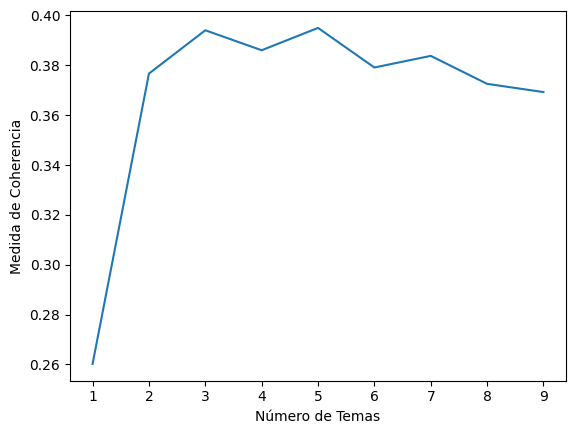

In [33]:
# Gráficar resultados
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_coherencia)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Coherencia")
plt.show()

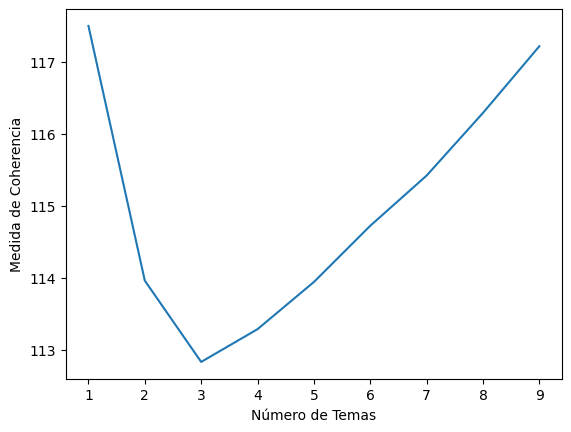

In [39]:
# Seleccionar cantidad de temas basado en la métrica de la perplejidad

# Definir la función de calculo iterativo de la perplejidad
def perplejidad(dictionary, corpus, texts, start=1, limit=10, step=1):
    
    # Definir listas vacias donde almacenar la información de las corridas 
    valores_perplejidad = []
    lista_modelos = []
    
    # Iterar ajustando el número de temas
    for cantidad_temas in range(start, limit, step):
        model_LDA = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=cantidad_temas, 
                        random_state=123,
                        passes=20)
        lista_modelos.append(model_LDA)
        valores_perplejidad.append(np.exp2(-model_LDA.log_perplexity(corpus)))

    return lista_modelos, valores_perplejidad

# Aplicar función perplejidad
modelos_LDA, valores_perplejidad = perplejidad(dictionary=diccionario, corpus=corpus, texts=casciari_clean, start=1, limit=10, step=1)

# Gráficar resultados
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_perplejidad)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Coherencia")
plt.show()

In [44]:
# Entrenar y transformar

# Cargar libreria necesaria
from sklearn.decomposition import LatentDirichletAllocation

# Crear los vectores de palabras usando CountVectorizer y la listas de stopwords definidas en el punto anterior
count_vectorize = CountVectorizer(stop_words=list(nlp.Defaults.stop_words))
count_vectorize_matrix = count_vectorize.fit_transform(casciari['cuento'])
count_vectorize_matrix

# Inicializar el objeto LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(count_vectorize_matrix)
temas_por_cuento = lda_model.transform(count_vectorize_matrix)

# Crear matriz de distancias de coseno
cosine_distance = cosine_similarity(temas_por_cuento, temas_por_cuento)
cosine_distance

# Determinar las recomendaciones
recomendar(titulo_cuento = 'La venganza del metegol', distancia = cosine_distance, cantidad_recomendaciones = 5, base=casciari)

153          Nunca me importó el fútbol
405     La frente alta, la frente tersa
393        La leyenda del Negro Sánchez
400                     M'hijo el dotor
404    Tu cara me suena de alguna parte
Name: titulo, dtype: object

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Procedimiento:**
1. Crea el diccionario y el corpus con los textos limpios de los cuentos
2. Definir la función coherencia la cual realizará un proceso iterativo de ajuste de la cantidad de temas clasificados con el fin de determinar con qué cantidad de temas se logra la máxima coherencia
3. Definir la función perplejidad la cual realizará un proceso iterativo de ajuste de la cantidad de temas clasificados con el fin de determinar con qué cantidad de temas se logra la mínima perplejidad
4. Vectorizar los cuentos
5. Calcular la distancia de coseno
6. Hacer las recomendaciones

**Análisis:**
Se encuentra que con 3 temas se logra la máxima coherencia y la mínima perplejidad, los cuentos recomendados se relacionan con temas diversos desde la vejez, el futbol y la conexión familia hasta los sueños, parecer estar menos concentrados en un mismo enfoque que los métodos anteriores

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)

El procedimiento del TFID con la matriz de distancias de coseno y correlaciones, ambos generaron las mejores recomendaciones al identificar cuentos que trataban temas relacionados con la juventud y la añoranza de las amistades. Para implementar una evaluación objetiva de las recomendaciones se podría aplicar el índice de silhouette o evalouar la varianza interna de las recomendaciones, con el fin de identificar que recomendaciones se encuentran más cercanas entre sí. Así mismo, sería posible el uso de la métrica de la coherencia para validar la coherencia entre las recomendaciones dadas y el cuento base propuesto.